<a href="https://colab.research.google.com/github/soumik0303/PythonTuts/blob/main/Netflix_Case_study_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix is an American technology and media service provider and production company headquartered in Los Gatos,California.It was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley,California.The company's primary business is its subscription based streaming service,which offers online streaming of library of films and television series including those produced in-house.

#Business Problem

Analyze the data and generate the insights that could help Netflix to decide which type of movies/shows to produce and how they can grow the business in different countries.

#1.Defining problem statement and Analyzing basic metrics

#Import Libraries

Importing basic Libraries thet we need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset

Using the pandas library we will load the CSV file and will name it with 'netflix_df'

In [2]:
netflix_df=pd.read_csv('netflix.csv')

Let's check the first 5 data

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


The dataset contains over 8807 titles and 12 descriptions. After a quick view of the dataframes,it looks like a typical movies/shows dataframe without ratings,we can also find there are Nan values in some columns

#2.Observations on the shape of data,datatypes of all the attributes to category(if required),missing value detection and statistical summary

to get all the attributes

In [5]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Shape of Data

In [6]:
netflix_df.shape

(8807, 12)

So it has 8807 rows and 12 columns and it's a 2D dataframe

Datatype of all the attributes

In [7]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Statistical Summary before Data Cleaning

In [8]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#Missing value detection
#Data Profiling and Cleaning

Data cleaning means the process of identifying incorrect,incomplete,inaccurate,irrelevant or missing pieces of data and then modifying replacing or deleting them as needed,Data Cleaning is considered as basic element of Data Science.

In [9]:
print('\n Columns with missing value: ')
print(netflix_df.isnull().any())


 Columns with missing value: 
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


From the info,we know that there are 8807 entries and 12 columns to work with for this EDA. There are a few columns that deals with null values to be specified- 'director','cast','country','date_added' and 'rating'

In [10]:
netflix_df.T.apply(lambda x:x.isnull().sum(),axis=1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
netflix_df.isnull().sum().sum()

4307

There are total 4307 null values accross the entire dataset with 2634 missing points under 'director',825 under 'cast',831 under 'country',10 under 'date_added',4 under 'rating' and 3 under 'duration'. we will have to handle all null data points before we can dive into Exploratory Data Analysis and modelling

#Imputation is a treatment method for missing value by filling it by using some certain techniques.
can use mean,mode or use predictive modelling.In this case-study we will discuss the 'fillna' function from Pandas for this imputation.Drop rows containing missing values will be completed by 'dropna' function from Pandas

In [12]:
netflix_df.director.fillna('No Director',inplace=True)
netflix_df.cast.fillna('No Cast',inplace=True)
netflix_df.country.fillna('Country Unavailable',inplace=True)
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [13]:
netflix_df.dropna(subset=['duration'],inplace=True)

#Checking missing values

In [14]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

For missing values the easiest way to get rid of them is to delete the rows with missing data.However this would't be beneficial for our EDA since there is a loss of information.Since 'director','cast' and country contain the majority of the null values,we choose to treat each missing value as 'unavailable data'.The other three label 'date_added','rating','duration' contain an insignificant portion of the data,so we can drop those rows from our dataset.finally we can see there are no missing values in our dataframe

#Statistical Summary after the data cleaning

In [15]:
netflix_df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#3.Non-graphical Analysis:
Non Graphical analysis involves calculating the summary statistics without usin pictorial or graphical representation. There are 3 main functions that pandas library provides us and we are going to discuss that.Those functions are,
1.info()
2.isna().sum() OR isnull().sum()
3.describe()

checking the data using .head()

In [16]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#4.Exploratory analysis and visualization
#Visual Analysis-Univariate,Bivariate after preprocessing of Data.
Univariate Analysis:-
Analysis is done on the base of single variate.we are not going to the math behind it

#Netflix content by Type
Analyse entire netflix dataset consisting of both movies and shows.Let's compare the total number shows ans movies in this dataset to know which one is in the majority

To get the result we have to prepare a pie chart

In [17]:
#to know the total number of different type of subject
netflix_df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

So we have 6126 movies and 2664 TV-Shows,now we are putting it into a pie chart to compare these numbers.

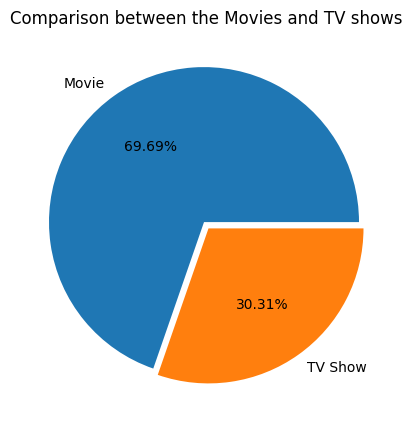

In [18]:
plt.figure(figsize=(5,10))
plt.pie(netflix_df['type'].value_counts(),labels=netflix_df['type'].value_counts().index,autopct='%2.2f%%',explode=[0.025,0.025])
plt.title('Comparison between the Movies and TV shows')
plt.show()

Now we will extract movie and show dataframes seperately

#Find out top 10 most movie produced country

In [19]:
movie_data=netflix_df[netflix_df['type']=='Movie']

In [20]:
filtered_m_c=movie_data.set_index('title').country.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
filtered_m_c=filtered_m_c[filtered_m_c!='Country Unavailable']
filtered_m_c.value_counts()[:10]

United States     2748
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
dtype: int64

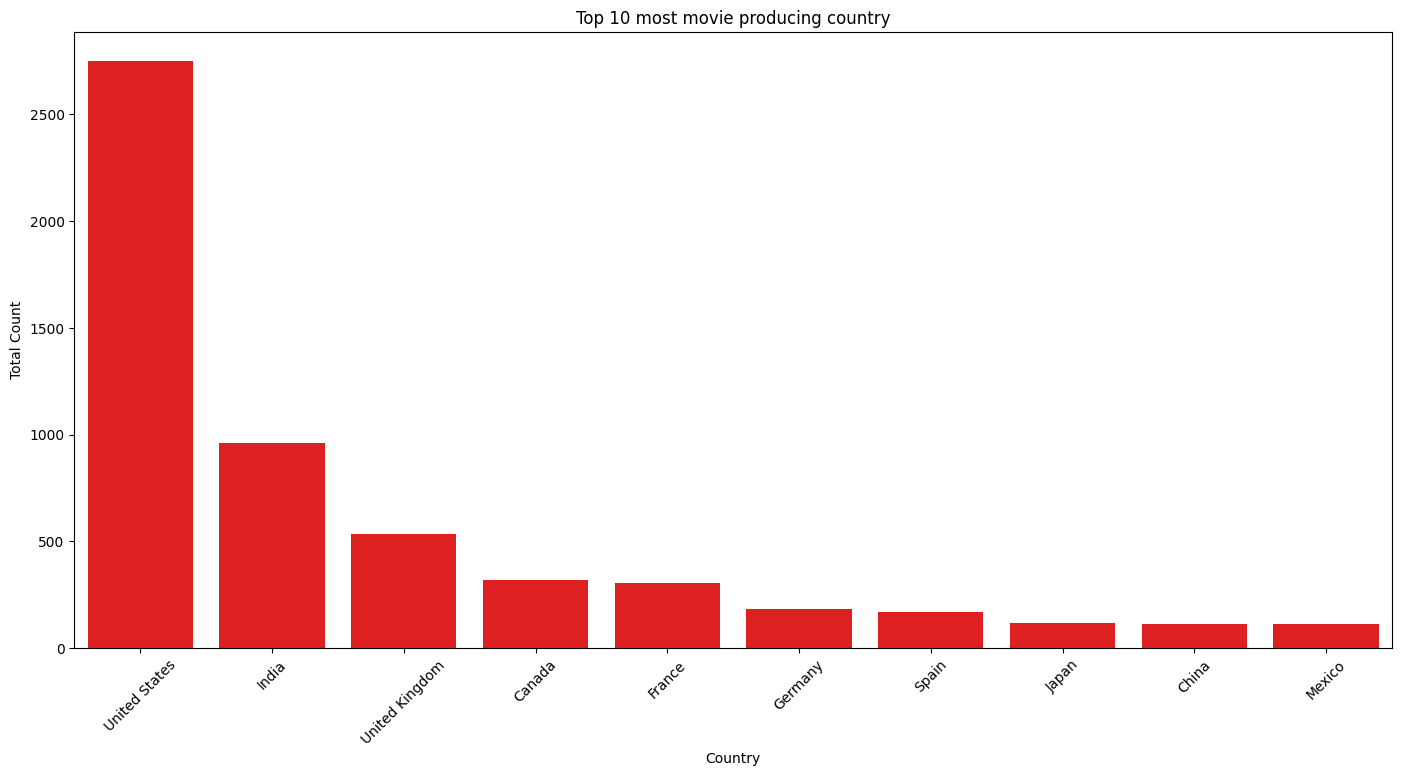

In [21]:
plt.figure(figsize=(17,8))
sns.barplot(x=filtered_m_c.value_counts().index[:10],y=filtered_m_c.value_counts()[:10],color='red')
plt.title('Top 10 most movie producing country')
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

#Find out top 10 most TV Shows producing countries

In [22]:
show_data=netflix_df[netflix_df['type']=='TV Show']
filtered_s_c=show_data.set_index('title').country.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
filtered_s_c=filtered_s_c[filtered_s_c!='Country Unavailable']
filtered_s_c.value_counts()[:10]

United States     932
United Kingdom    271
Japan             197
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          64
Spain              61
dtype: int64

Now we will visualize it

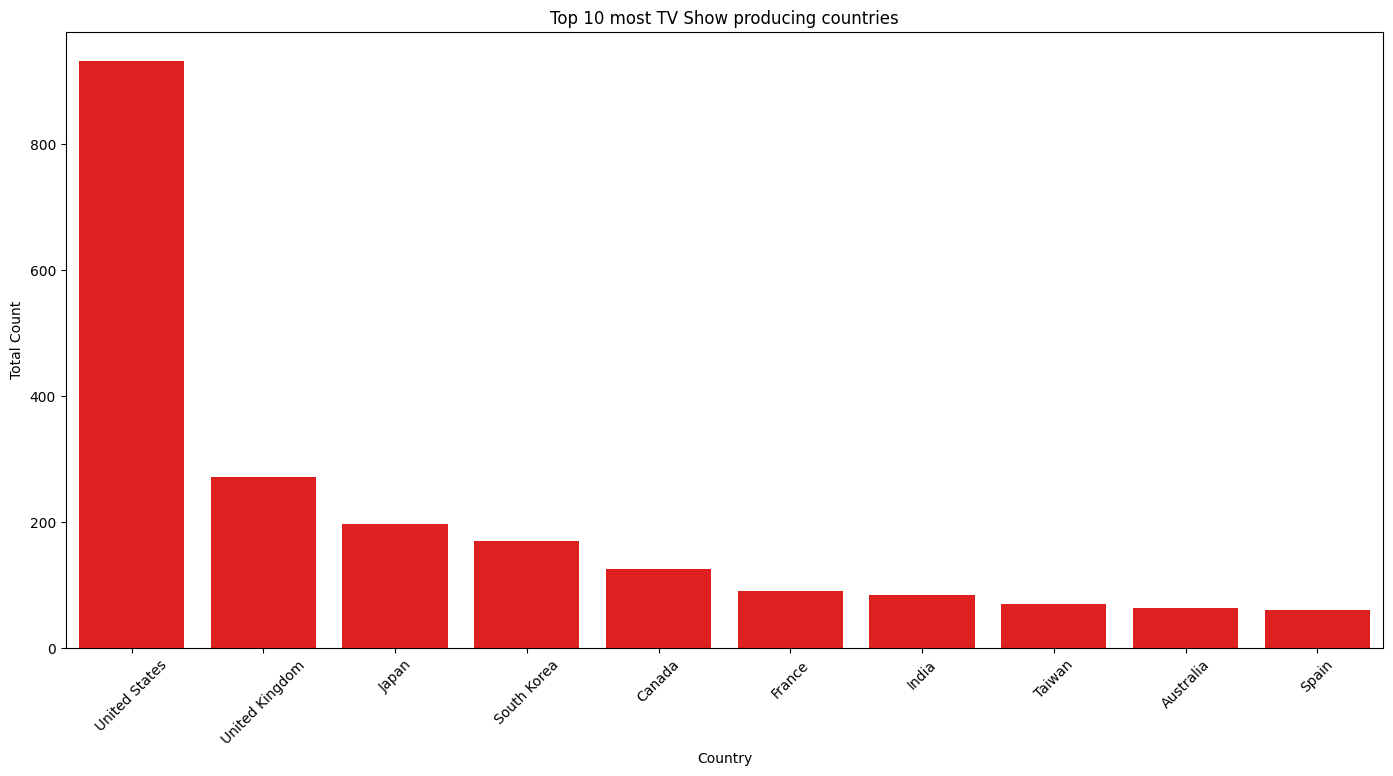

In [23]:
plt.figure(figsize=(17,8))
sns.barplot(x=filtered_s_c.value_counts().index[:10],y=filtered_s_c.value_counts()[:10],color='red')
plt.title('Top 10 most TV Show producing countries')
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

#What is the best time to launch a TV Show???

In [24]:
show_data['month_added']=pd.to_datetime(show_data['date_added']).dt.month_name()
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_counts=show_data['month_added'].value_counts().loc[month_order]

<ipython-input-24-d5c52747aaa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_data['month_added']=pd.to_datetime(show_data['date_added']).dt.month_name()


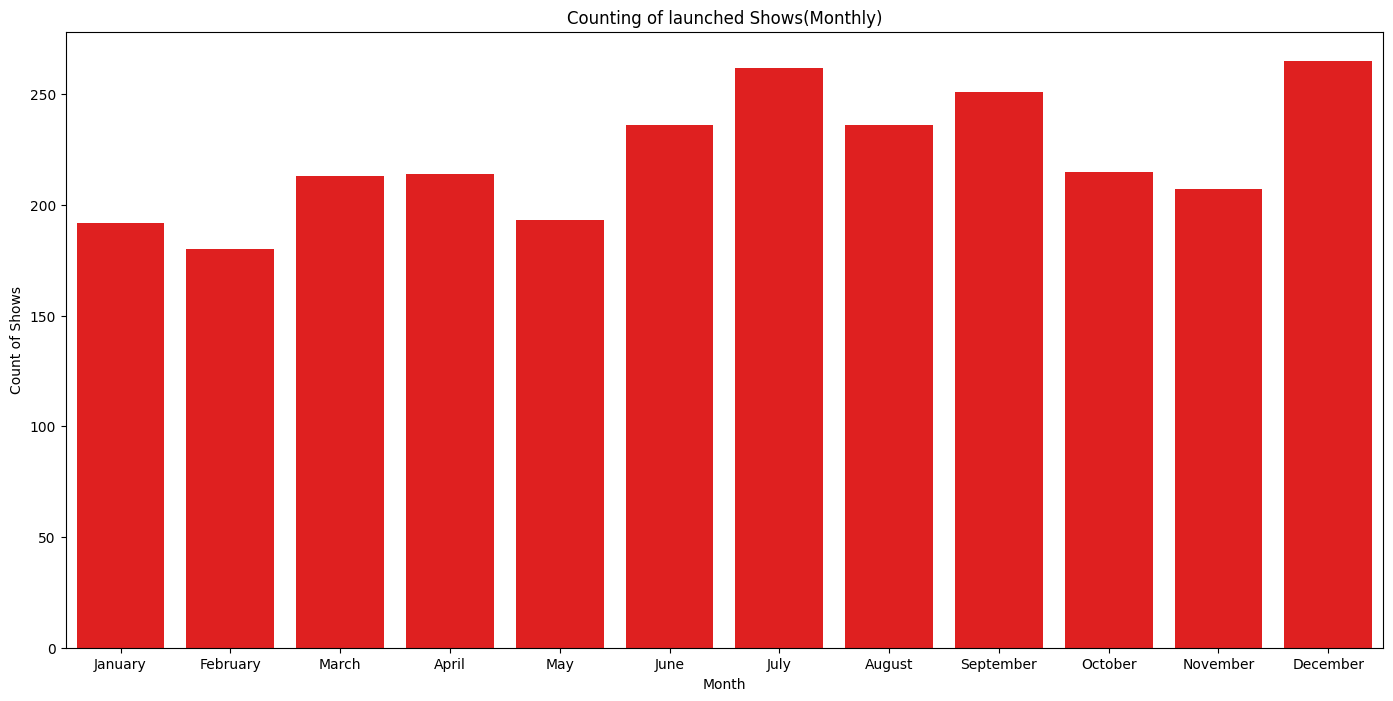

In [25]:
plt.figure(figsize=(17,8))
sns.barplot(x=monthly_counts.index,y=monthly_counts.values,color='red')
plt.title('Counting of launched Shows(Monthly)')
plt.xlabel('Month')
plt.ylabel('Count of Shows')
plt.show()

#Find out the day of the week on which maximum number of TV Shows have been released

In [26]:
show_data['day_added']=pd.to_datetime(show_data['date_added']).dt.day_name()
day_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day_counts=show_data['day_added'].value_counts().loc[day_order]

<ipython-input-26-8aae3656febb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_data['day_added']=pd.to_datetime(show_data['date_added']).dt.day_name()


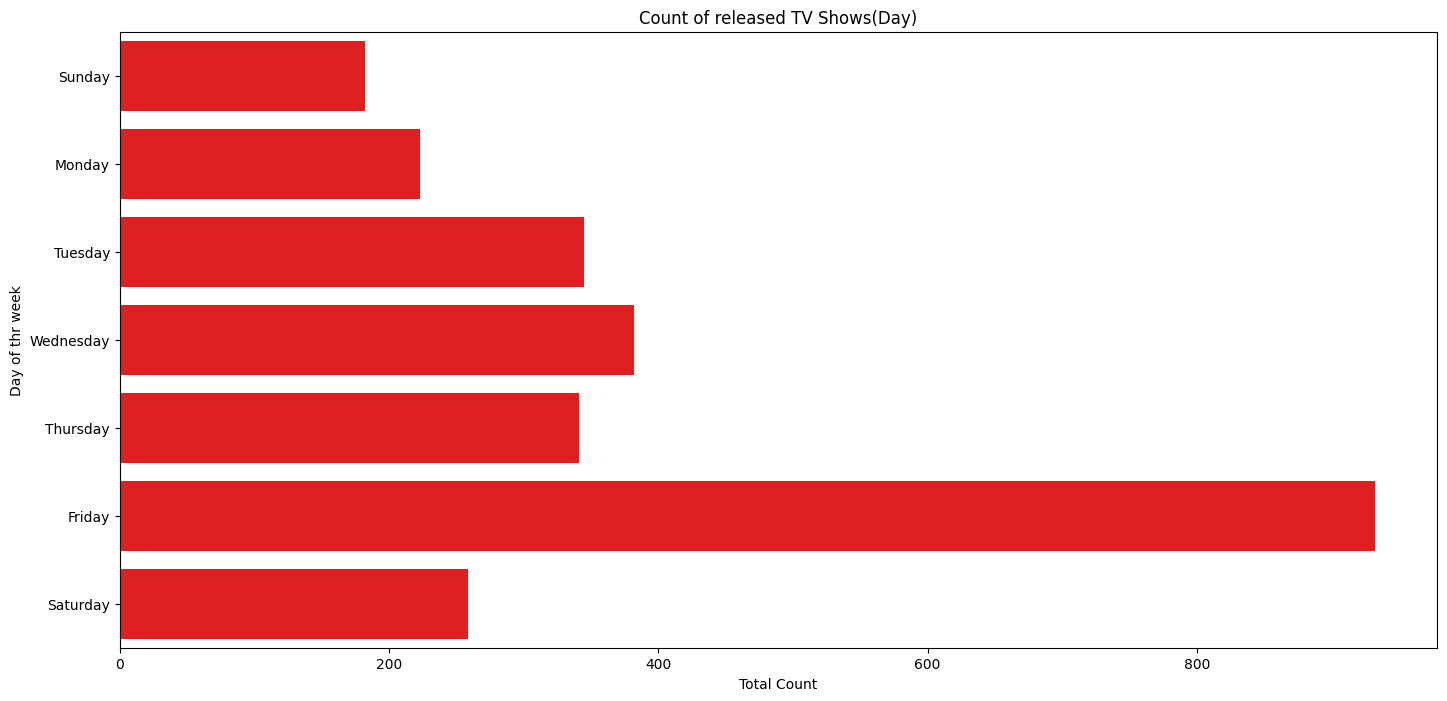

In [27]:
plt.figure(figsize=(17,8))
sns.barplot(x=day_counts.values,y=day_counts.index,color='red')
plt.title('Count of released TV Shows(Day)')
plt.xlabel('Total Count')
plt.ylabel('Day of thr week')
plt.show()

#Findout top 10 Directors who contributes on making movies or tv shows

In [28]:
director=netflix_df.set_index('title').director.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
director=director[director!='No Director']
director.value_counts()[:10]

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
dtype: int64

Here is the list of top 10 directors,who have made maximum number of movies or tv shows,now we will give it to a visual representation

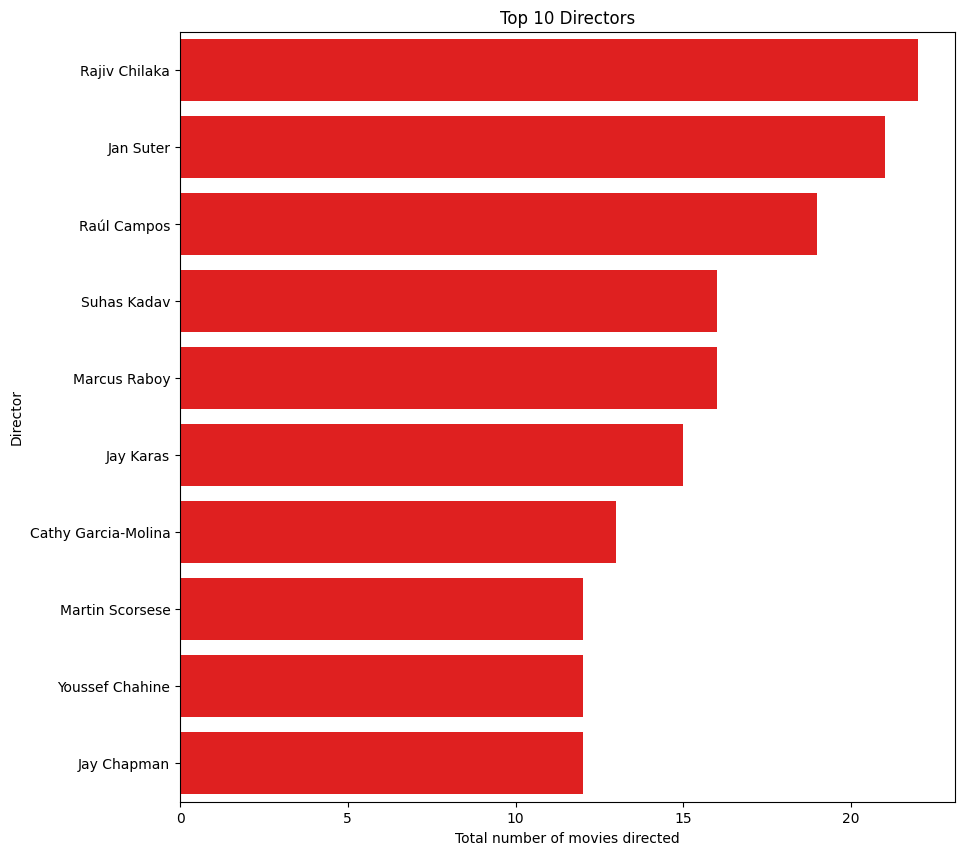

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x=director.value_counts()[:10],y=director.value_counts().index[:10],color='red')
plt.title('Top 10 Directors')
plt.xlabel('Total number of movies directed')
plt.ylabel('Director')
plt.show()

#Find Top 10 Actors who appeared in maximum number of movies or shows

In [30]:
filtered_actor=netflix_df.set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1,drop=True)
filtered_actor=filtered_actor[filtered_actor!='No Cast']
filtered_actor.value_counts()[:10]

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
 Rajesh Kava         26
Shah Rukh Khan       26
 Boman Irani         25
 Andrea Libman       25
 Paresh Rawal        25
dtype: int64

Here is the list of top 10 most appeared actors,the visualization of this result is-

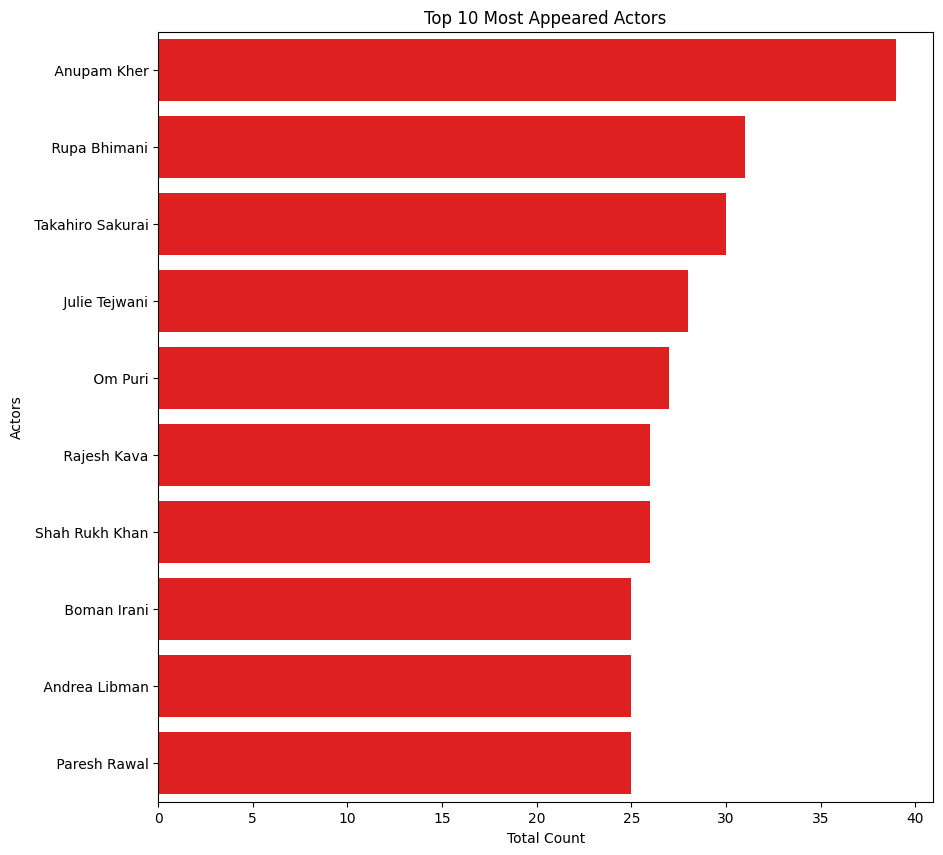

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(x=filtered_actor.value_counts()[:10],y=filtered_actor.value_counts().index[:10],color='red')
plt.title('Top 10 Most Appeared Actors')
plt.xlabel('Total Count')
plt.ylabel('Actors')
plt.show()

So according to the graphical representation Anupam Kher has appeared in most of the movies and TV shows,followed by Rupa Bhimani and Takahiru Sakurai,on the contrary Paresh Rawal is the least appeared Actor among the 10 Top most appeared actors

#Find the mostly watched movie Genre

In [32]:
movie_data[:3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [33]:
filtered_genre_movie=movie_data.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
filtered_genre_movie.value_counts()[:10]

International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
dtype: int64

Now we will vizualize the data

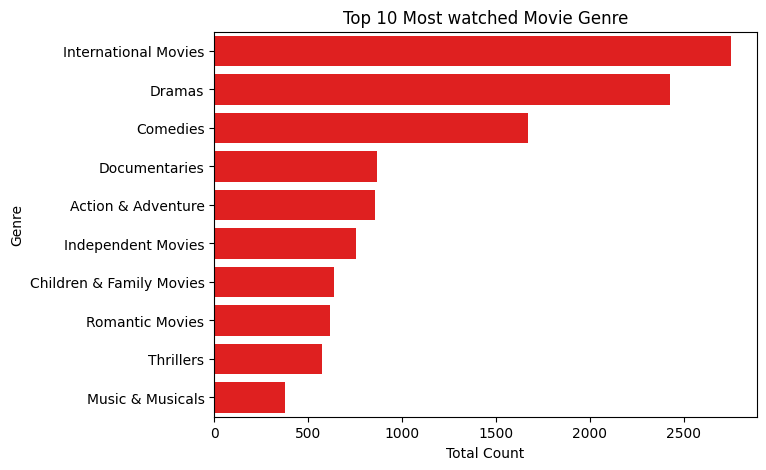

In [34]:
plt.figure(figsize=(7,5))
sns.barplot(x=filtered_genre_movie.value_counts()[:10],y=filtered_genre_movie.value_counts().index[:10],color='red')
plt.title('Top 10 Most watched Movie Genre')
plt.xlabel('Total Count')
plt.ylabel('Genre')
plt.show()

So International Movies,Dramas and comedy are the mostly preferred Genre for the viewers in Movie category

#Find Mostly watched TV Show Genre

In [35]:
filtered_genre_show=show_data.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
filtered_genre_show.value_counts()[:10]

International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
dtype: int64

Now we will vizualize the Data

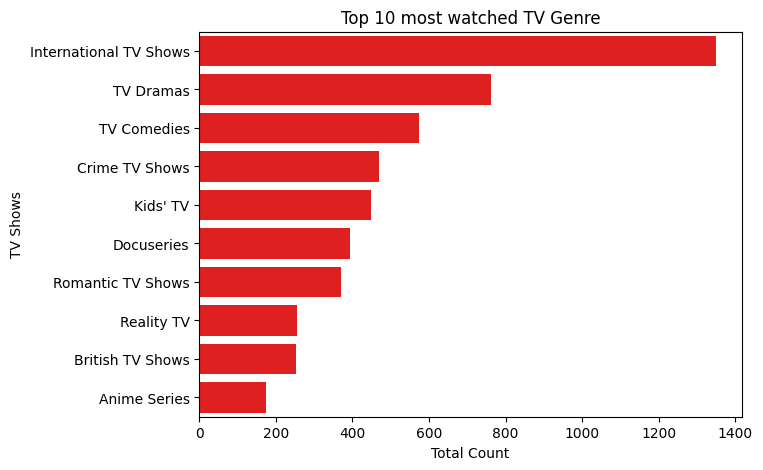

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(x=filtered_genre_show.value_counts()[:10],y=filtered_genre_show.value_counts().index[:10],color='red')
plt.title('Top 10 most watched TV Genre')
plt.xlabel('Total Count')
plt.ylabel('TV Shows')
plt.show()

So mostly watched TV Show genres are International TV Shows,TV Dramas and TV Comedies

#Rating Analysis for movies

In [37]:
rating_movies=movie_data.groupby('rating').aggregate({'title':'nunique'}).sort_values(['title'],ascending=False)
rating_movies=rating_movies.reset_index()
top10movierating=rating_movies[:10]

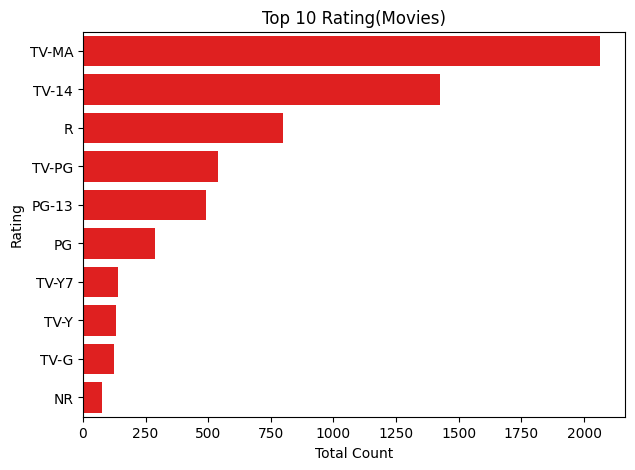

In [38]:
plt.figure(figsize=(7,5))
sns.barplot(x='title',y='rating',data=top10movierating,color='red')
plt.title('Top 10 Rating(Movies)')
plt.xlabel('Total Count')
plt.ylabel('Rating')
plt.show()

So,in our dataset we have most number of TV-MA,TV-14 and R rated movies

#Find out Top 5 ratings for TV Shows

In [39]:
rating_shows=show_data.groupby('rating').aggregate({'title':'nunique'}).sort_values(['title'],ascending=False)
rating_shows=rating_shows.reset_index()
top5showrating=rating_shows[:5]
top5showrating

,rating,title
0,TV-MA,1143
1,TV-14,730
2,TV-PG,321
3,TV-Y7,194
4,TV-Y,175


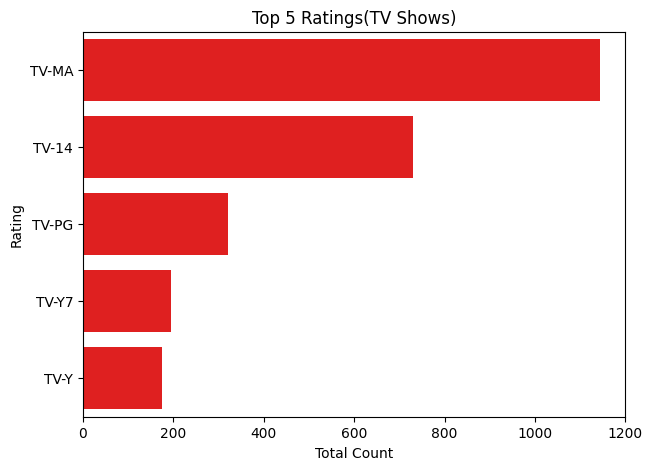

In [40]:
plt.figure(figsize=(7,5))
sns.barplot(x='title',y='rating',data=top5showrating,color='red')
plt.title('Top 5 Ratings(TV Shows)')
plt.xlabel('Total Count')
plt.ylabel('Rating')
plt.show()

so,our dataset is containing TV-MA,TV-14 and TV-PG as its top picked rankings

#Content Distribution accross USA INDIA and UK for all the content

In [41]:
content_from_india=netflix_df.groupby('country').get_group('India').reset_index(drop=True)
content_count_India=content_from_india['type'].value_counts(normalize=True)

content_from_usa=netflix_df.groupby('country').get_group('United States').reset_index(drop=True)
content_count_USA=content_from_usa['type'].value_counts(normalize=True)

content_from_uk=netflix_df.groupby('country').get_group('United Kingdom').reset_index(drop=True)
content_count_UK=content_from_uk['type'].value_counts(normalize=True)

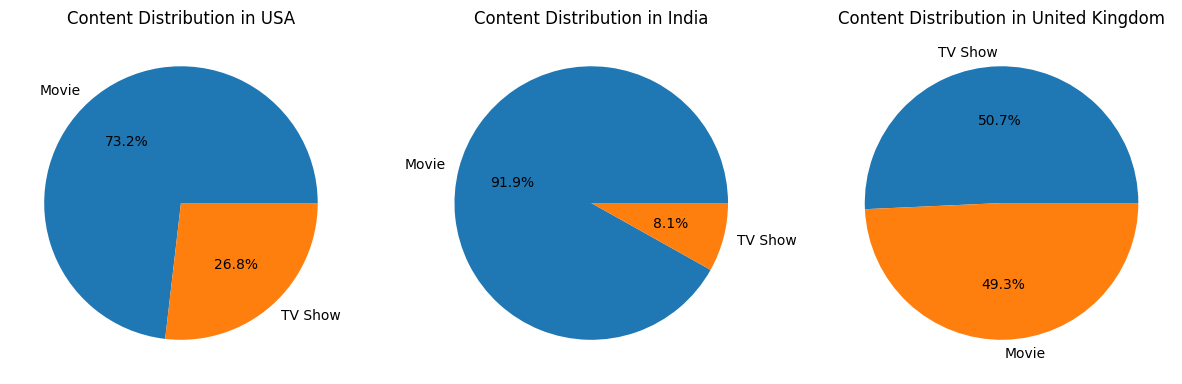

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.pie(content_count_USA,labels=content_count_USA.index,autopct='%1.1f%%')
plt.title('Content Distribution in USA')

plt.subplot(1,3,2)
plt.pie(content_count_India,labels=content_count_India.index,autopct='%1.1f%%')
plt.title('Content Distribution in India')

plt.subplot(1,3,3)
plt.pie(content_count_UK,labels=content_count_UK.index,autopct='%1.1f%%')
plt.title('Content Distribution in United Kingdom')
plt.show()

So,movie is added as maximum content both in India and USA,but in UK, TV content is marginally higher than that of movie

#Content release over the Years


In [43]:
movie_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [44]:
#converting the object into datetime format
movie_data['release_year']=pd.to_datetime(movie_data['release_year'])
show_data['release_year']=pd.to_datetime(show_data['release_year'])

<ipython-input-44-eb51cfcc994a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['release_year']=pd.to_datetime(movie_data['release_year'])
<ipython-input-44-eb51cfcc994a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_data['release_year']=pd.to_datetime(show_data['release_year'])


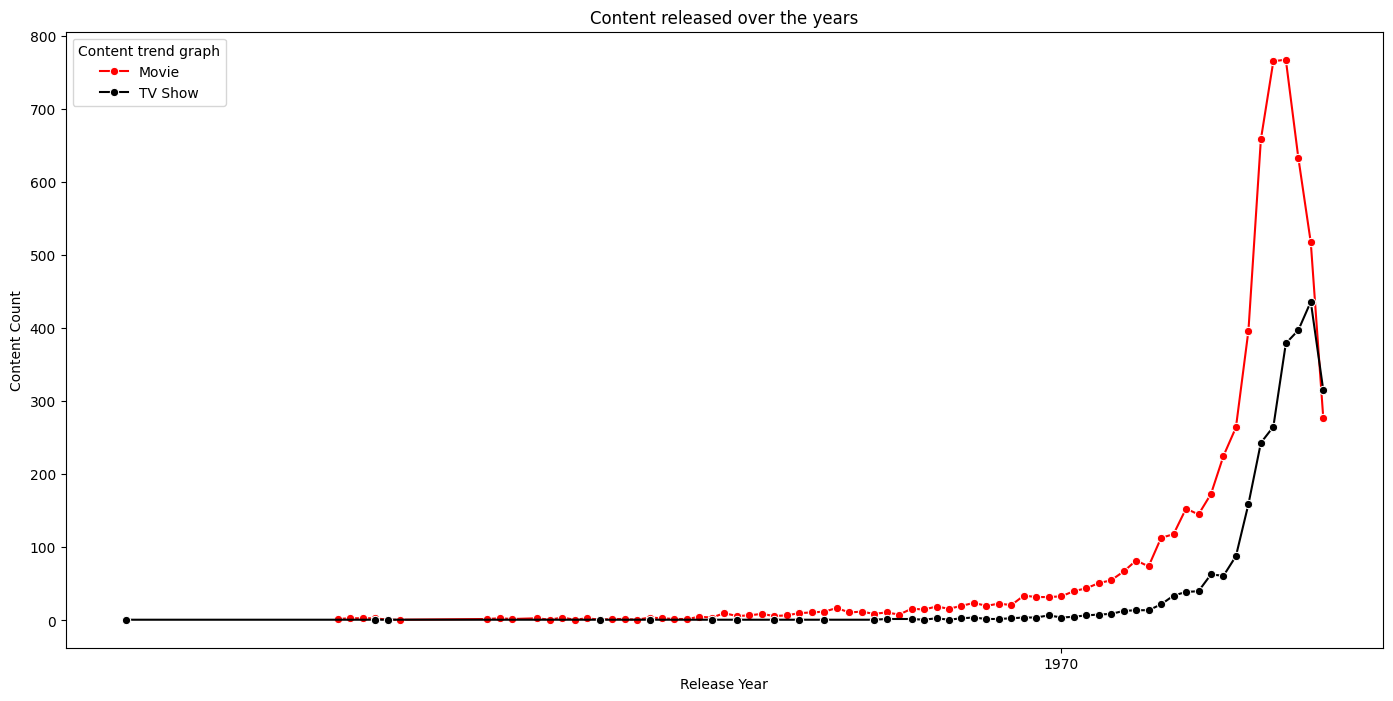

In [45]:
movie_agg=movie_data.groupby('release_year').agg({'title':'nunique'}).reset_index()
show_agg=show_data.groupby('release_year').agg({'title':'nunique'}).reset_index()

plt.figure(figsize=(17,8))
sns.lineplot(x='release_year',y='title',data=movie_agg,marker='o',color='red',label='Movie')
sns.lineplot(x='release_year',y='title',data=show_agg,marker='o',color='black',label='TV Show')
plt.title('Content released over the years')
plt.xlabel('Release Year')
plt.ylabel('Content Count')
plt.legend(title='Content trend graph')
plt.show()

According to the graph TV Show contents get increased by the years of last decades

**Content added over the years in Netflix**

In [46]:
movie_data['year_added']=pd.to_datetime(movie_data['date_added']).dt.year
show_data['year_added']=pd.to_datetime(show_data['date_added']).dt.year

<ipython-input-46-4cc1dd614834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['year_added']=pd.to_datetime(movie_data['date_added']).dt.year
<ipython-input-46-4cc1dd614834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_data['year_added']=pd.to_datetime(show_data['date_added']).dt.year


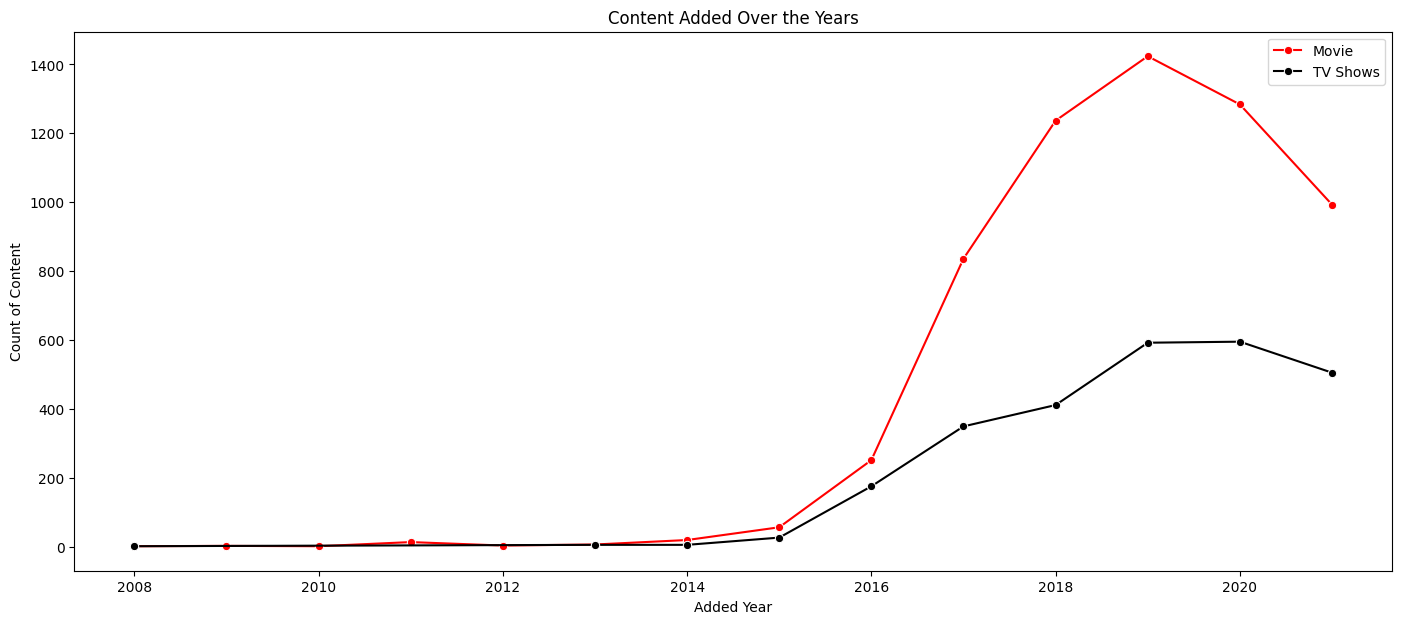

In [47]:
movie=movie_data.groupby('year_added').agg({'title':'nunique'}).reset_index()
show=show_data.groupby('year_added').agg({'title':'nunique'}).reset_index()

plt.figure(figsize=(17,7))
sns.lineplot(x='year_added',y='title',data=movie,color='red',marker='o',label='Movie')
sns.lineplot(x='year_added',y='title',data=show,color='black',marker='o',label='TV Shows')
plt.title('Content Added Over the Years')
plt.xlabel('Added Year')
plt.ylabel('Count of Content')
plt.show()

So,over the years Netflix has added more movie content than TV-show contents

#Content growth in Netflix for the last 10 years

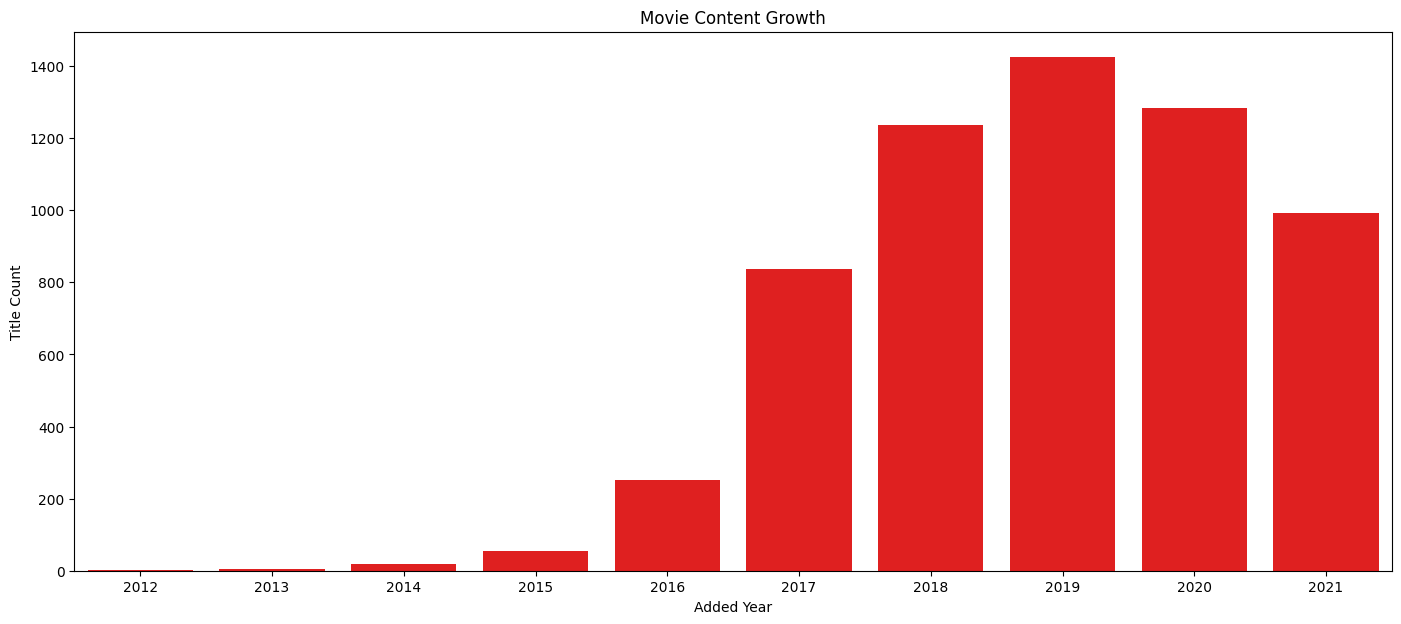

In [48]:
#Movie Trend
last_year_added=movie['year_added'].max()
diff=last_year_added - 10
#movies in last 10 years
movies_in_last_decade=movie[(movie['year_added'] > diff) & (movie['year_added']<= last_year_added)]
movies_in_last_decade['title'].value_counts()


plt.figure(figsize=(17,7))
sns.barplot(x='year_added',y='title',data=movies_in_last_decade,color='red')
plt.title('Movie Content Growth')
plt.xlabel('Added Year')
plt.ylabel('Title Count')
plt.show()

Adding of movie contents started to take growth from 2015 and it was peak on 2019.

In [49]:
#TV Show trend
last_year_added=show['year_added'].max()
diff=last_year_added - 10

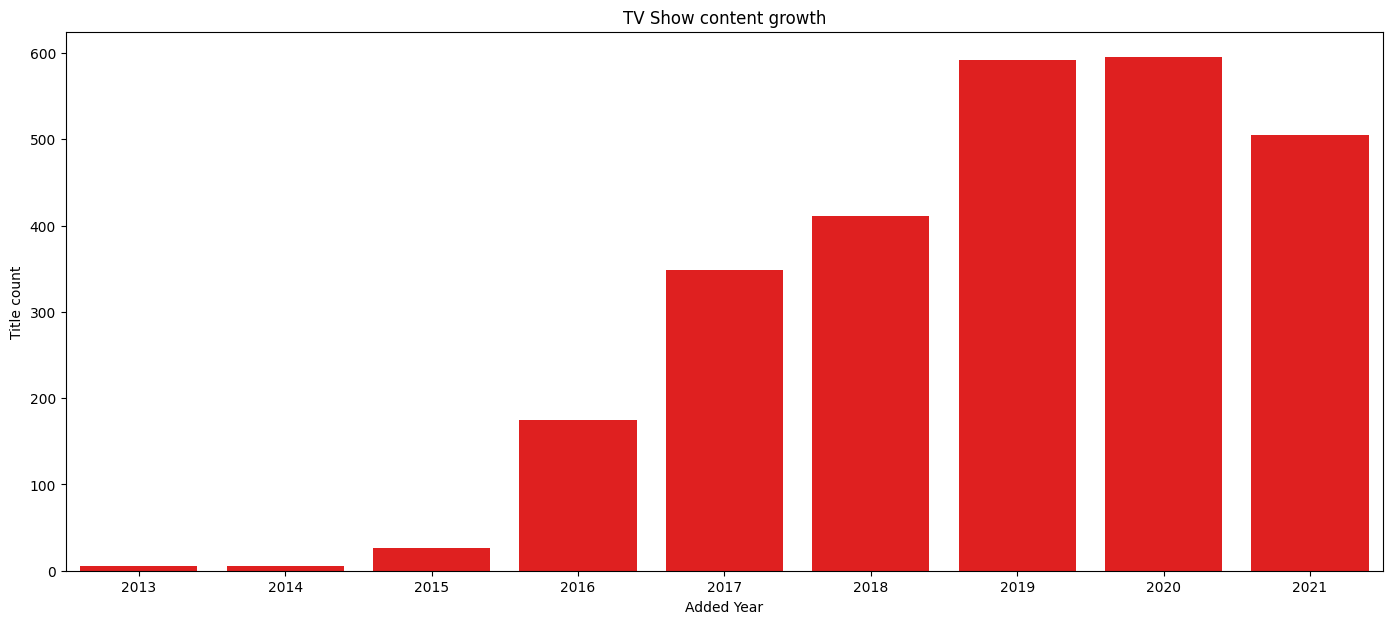

In [50]:
#shows in last 10 years
shows_in_last_decade=show[(show['year_added']>diff) & (show['year_added']<=last_year_added)]
shows_in_last_decade['title'].value_counts()

plt.figure(figsize=(17,7))
sns.barplot(x='year_added',y='title',data=shows_in_last_decade,color='red')
plt.title('TV Show content growth')
plt.xlabel('Added Year')
plt.ylabel('Title count')
plt.show()


TV Show content growth in last 10 years was highest during 2019 and 2020 bt it took a dip in 2021

#Duration Analysis for TV Shows and movies

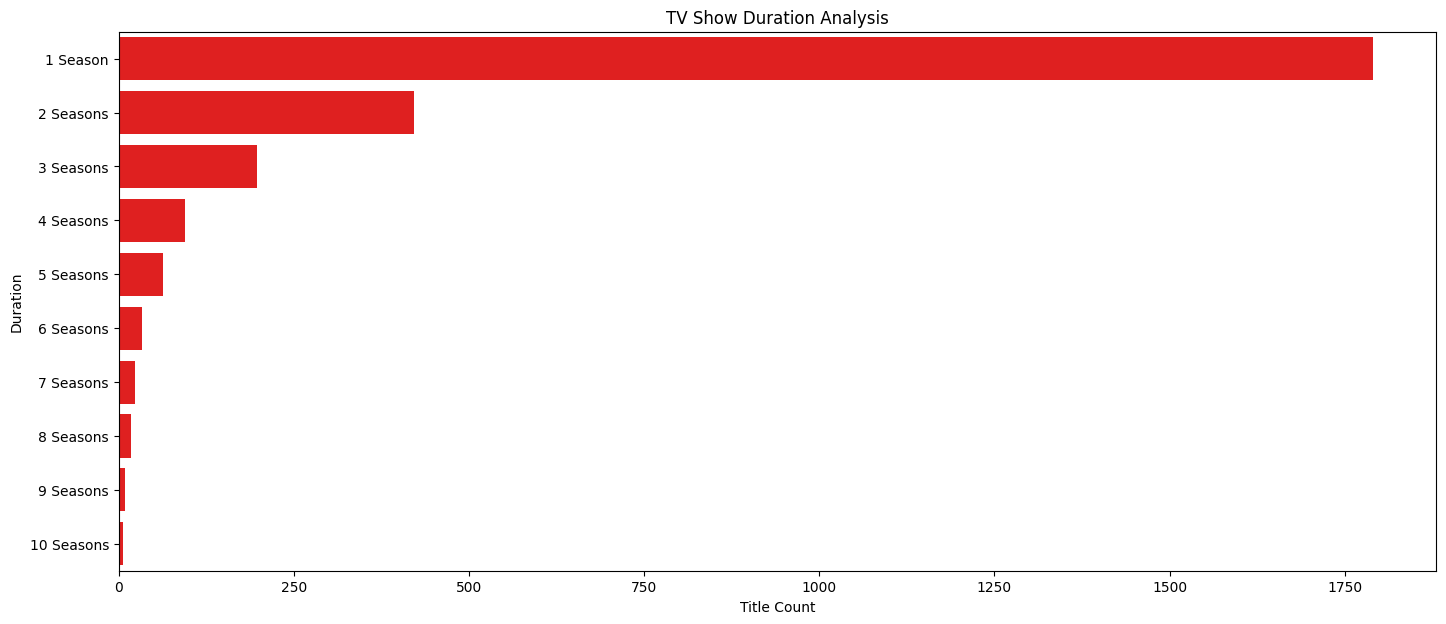

In [51]:
#TV Show Duration Trend
TV_duration=show_data.groupby('duration').agg({'title':'nunique'}).reset_index()
TV_duration=TV_duration.sort_values(['title'],ascending=False)[:10]

plt.figure(figsize=(17,7))
sns.barplot(x='title',y='duration',data=TV_duration,color='red')
plt.title('TV Show Duration Analysis')
plt.xlabel('Title Count')
plt.ylabel('Duration')
plt.show()

So,Netflix has maximum number of shows in 1st season as duration

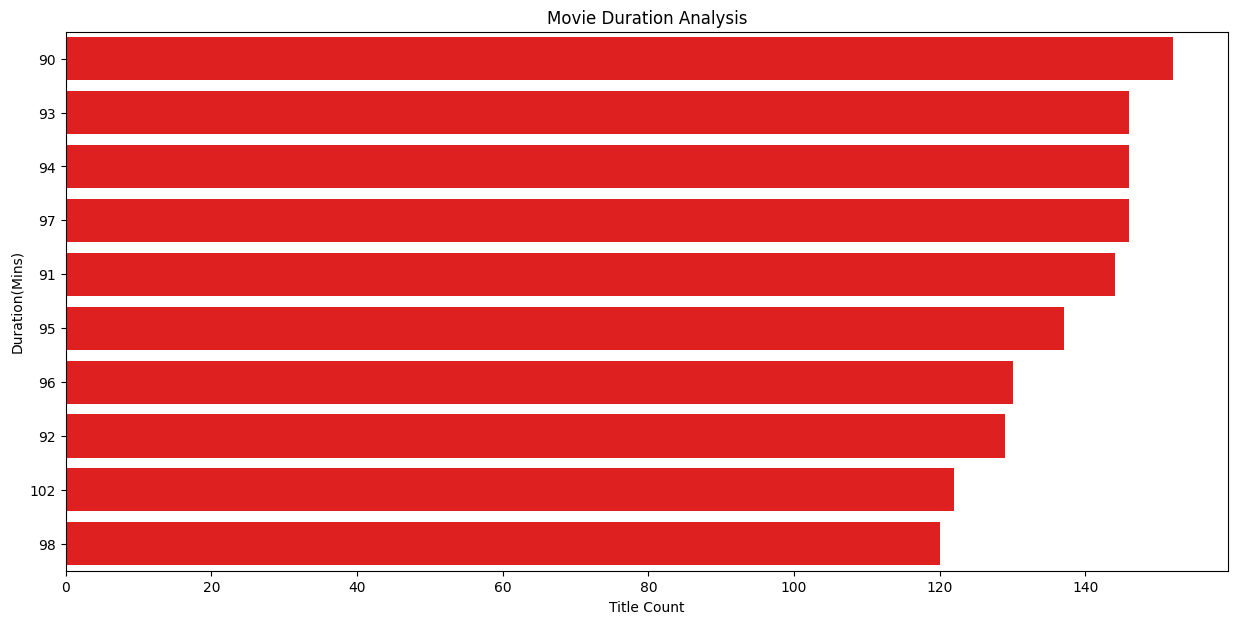

In [52]:
#Movies Duration Trend
movie_duration=movie_data.groupby('duration').agg({'title':'nunique'}).reset_index()
movie_duration=movie_duration.sort_values(['title'],ascending=False)[:10]
movie_duration['duration']=movie_duration['duration'].str.split().str[0]

plt.figure(figsize=(15,7))
sns.barplot(x='title',y='duration',data=movie_duration,color='red')
plt.title('Movie Duration Analysis')
plt.xlabel('Title Count')
plt.ylabel('Duration(Mins)')
plt.show()

The duration of maximum number of movies is 90 Mins,,but on an average movies have the length of 95-96 Mins.

#NETFLIX: CASE-STUDY
Insights:-

1.While comparing movies and TV-shows we got that Netflix has movie contents than TV-shows.

2.USA,India and UK are the top most Netflix Movie producing countries.

3.On the contrary,USA,UK and Japan are the top most Netflix TV Show producing countries.

4.Through Analysis we have found that July and December are the month when Netflix adds most of the numbers of TV shows due to summer holiday and Winter vacation through out the world.

5.Netflix releases maximum number of TV shows on friday.

6.while analysing the contribution of the directors bof being appeared for maximum number of movies and TV shows we have found that Rajiv Chilaka tops the list followed by Jan Suter and Raul Campos.

7.Mostly appeared actors for movies and  TV shows is Anupam Kher followed by Rupa Bhimani and Takahiro Sakurai.

8.International Movies,Dramas,Comedies are in maximum number of Genre that present in Netflix platform.

9.On the other hand International TV Shows ,TV-Dramas and TV-Comedies are the genre that present in maximum number in Netflix Platform.

10.TV-MA rated contents are mostly present both in movies and TV shows.

11.Movies are added as maximum content both in USA and India but in United Kingdom TV-Show contents are marginally higher addition than that of movies.

12.Both the Movies and TV contents get increased by the time of last decade.

13.Netflix has released more movies than TV shows.

14.Adding movie content in Netflix platform took a growth from 2015,and was peak in 2019,but again in 2020 it took a dip.

15.Adding of TV content took a sharp growth in 2019-2020,but again in 2021 it had a dip.

16.Maximum number of shows in Netflix present in its 1st season.

17.Duration of maximum number of movies is 90 Mins,but on an average duration runs between 90-96 Mins.

#NETFLIX CASE-STUDY
BUSINESS RECOMMENDATIONS:-

1.Apart from India,USA and UK other countries should produce more movies for Netflix Platform.

2.During July and December Netflix releases more shows due to holidays,Netflix should target seperate countries and their long holiday schedule to release more shows on that time.

3.Netflix should release more movies on friday as 2 days of weekly holiday is present there,but on the othe hand they should not release shows on sundays.

4.International movies,Dramas and Comedies should release more,as these categories have strong hold on the Netflix platform.

5.TV-MA rated movie and TV shows are highly in demand,so Netflix should release more contents in this rating.

6.India,USA should get more movie content and UK should have more TV Show content as they have demand for it.

7.Netflix should not divide the TV shows in maximum number of seasons,as 1st seasons get most of the popularities than others for any TV show.

8.Netflix should release maximum movies with maximum avg of Duration of 90 to 96 Minutes.

